In [1]:
import fastf1.plotting
import f1analytics as f1

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(color_scheme='fastf1' )

session_year = 2025
session_name = "Mexico Grand Prix"
session_type = 'FP3'


# load a session and its telemetry data
session = fastf1.get_session(session_year, session_name, session_type)
session.load()
# In this way i Can exclude the box laps
laps = session.laps

results = session.results

circuit_info = session.get_circuit_info()

weather = session.weather_data



req         WARNING 	DEFAULT CACHE ENABLED! (3.75 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Mexico City Grand Prix - Practice 3 [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been 

In [3]:
t = f1.telemetry.Telemetry(
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

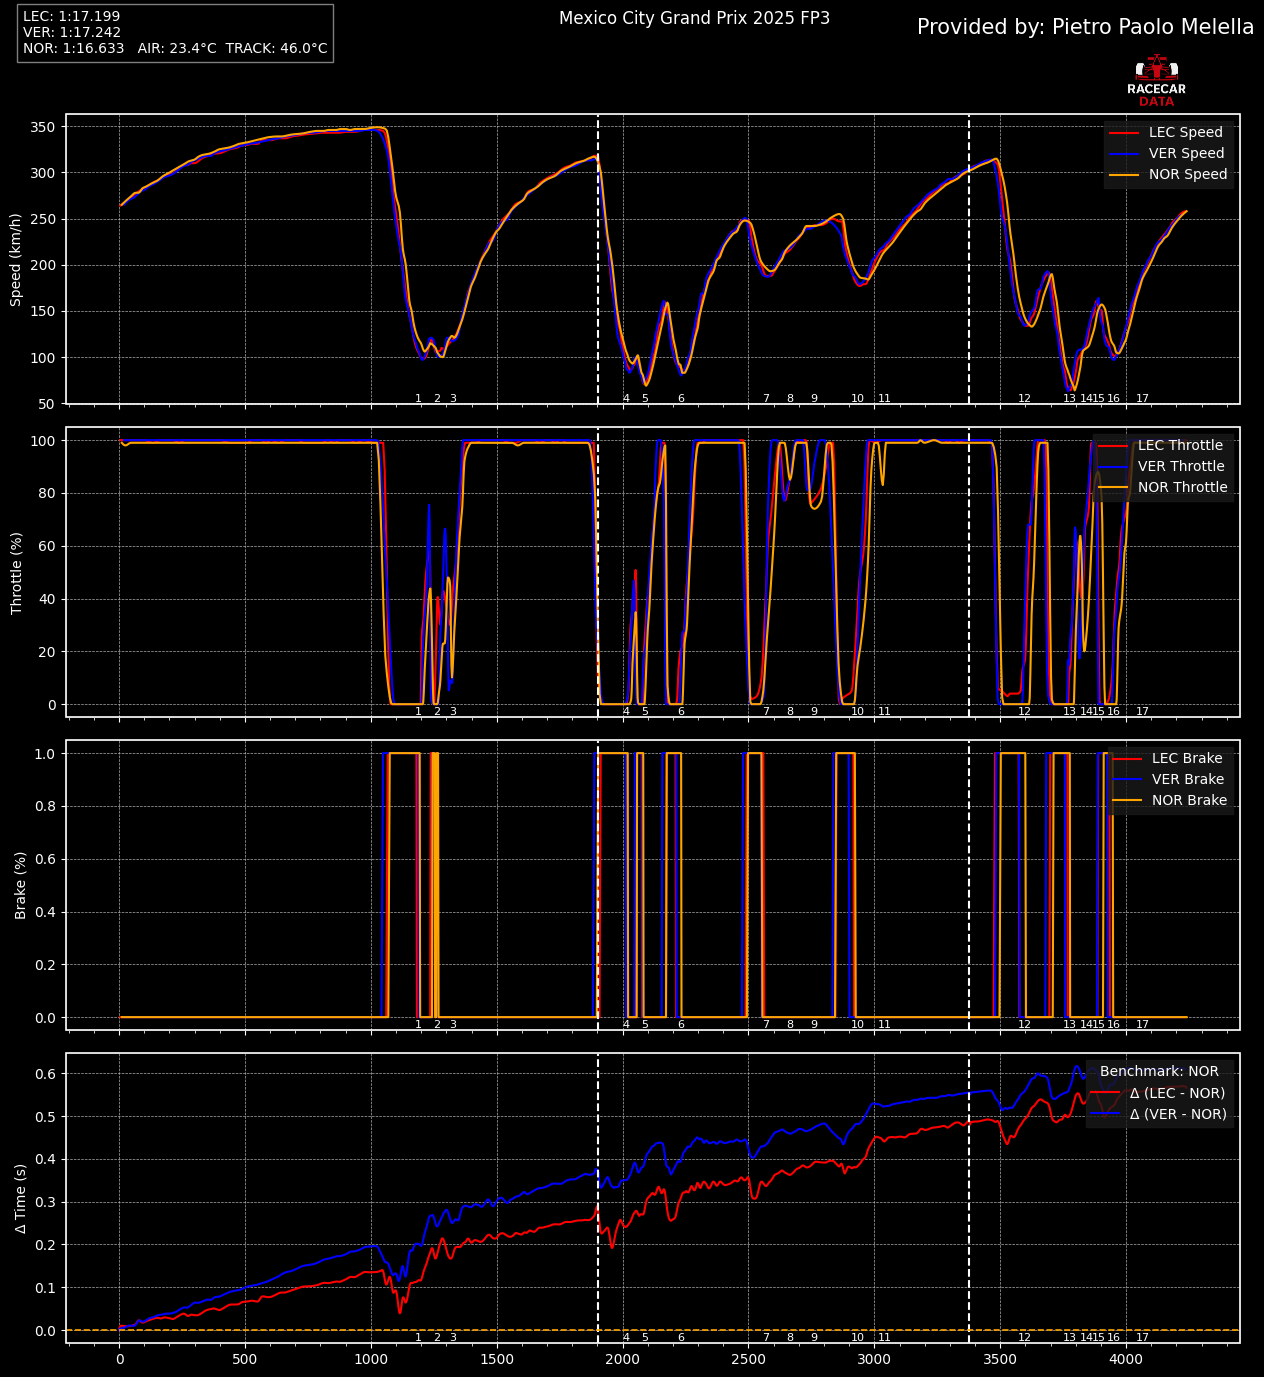

In [4]:
t.compare_laps(
    drivers={'LEC': 'fastest', 'VER': 'fastest', 'NOR': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

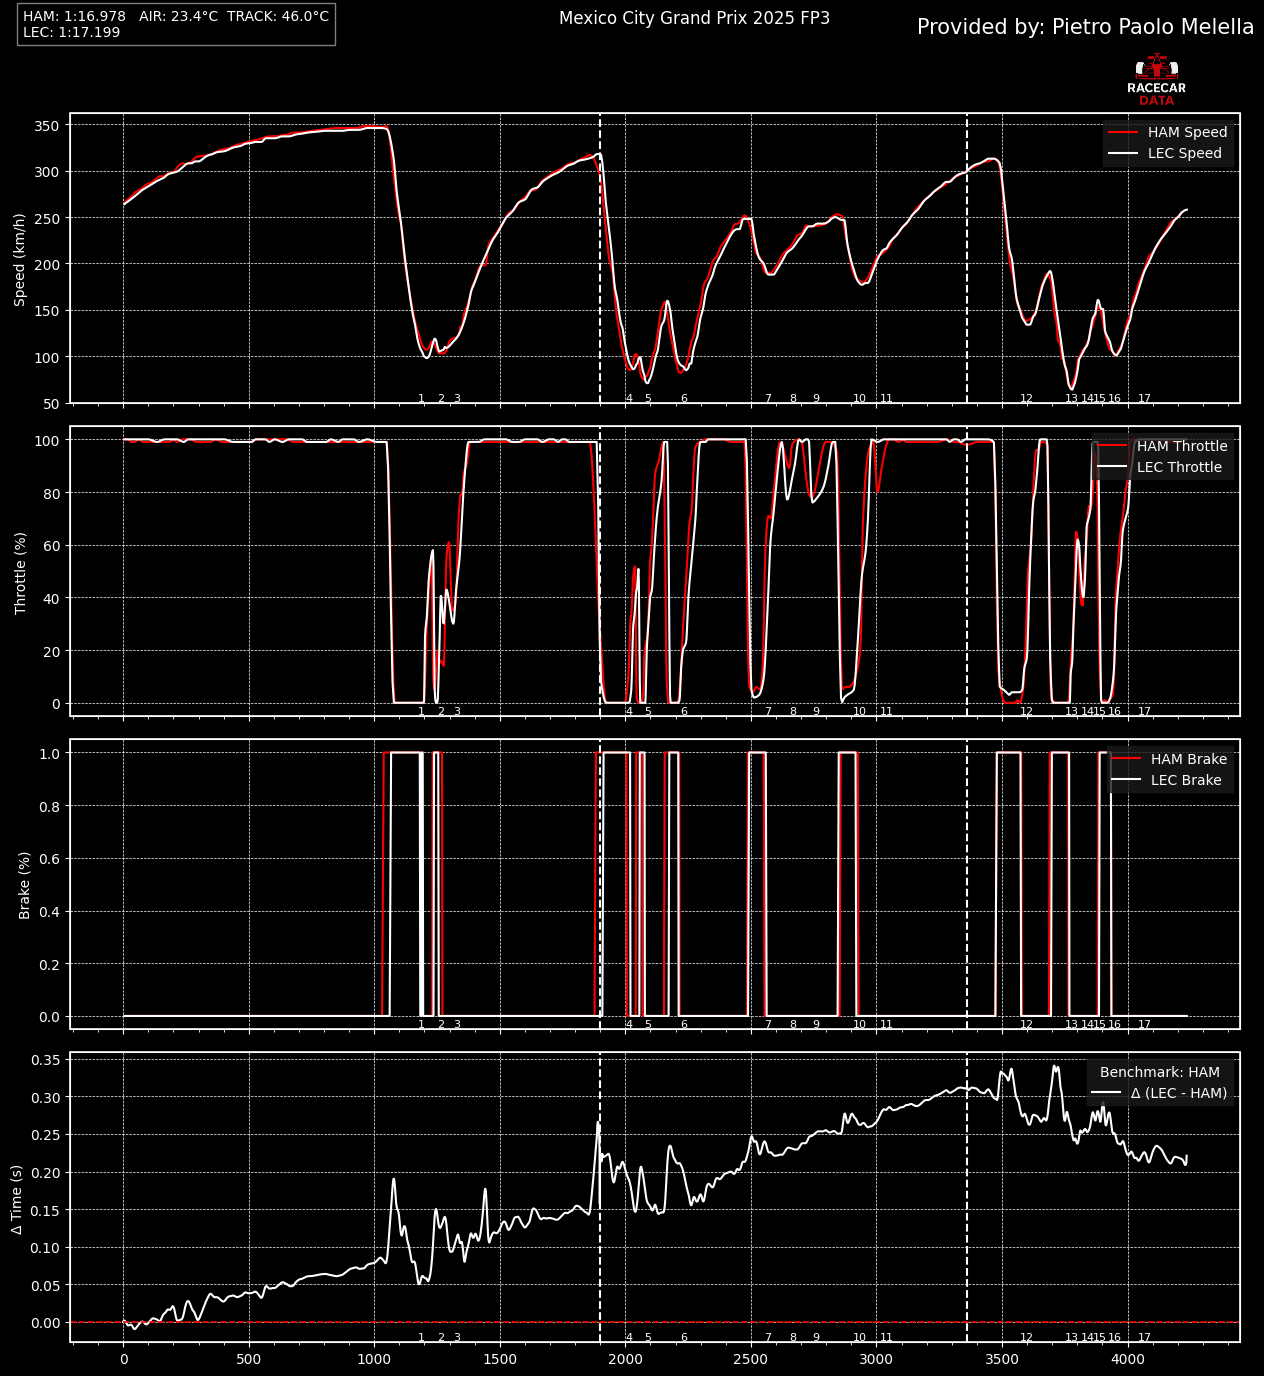

In [5]:
t.compare_laps(
    drivers={'HAM': 'fastest', 'LEC': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

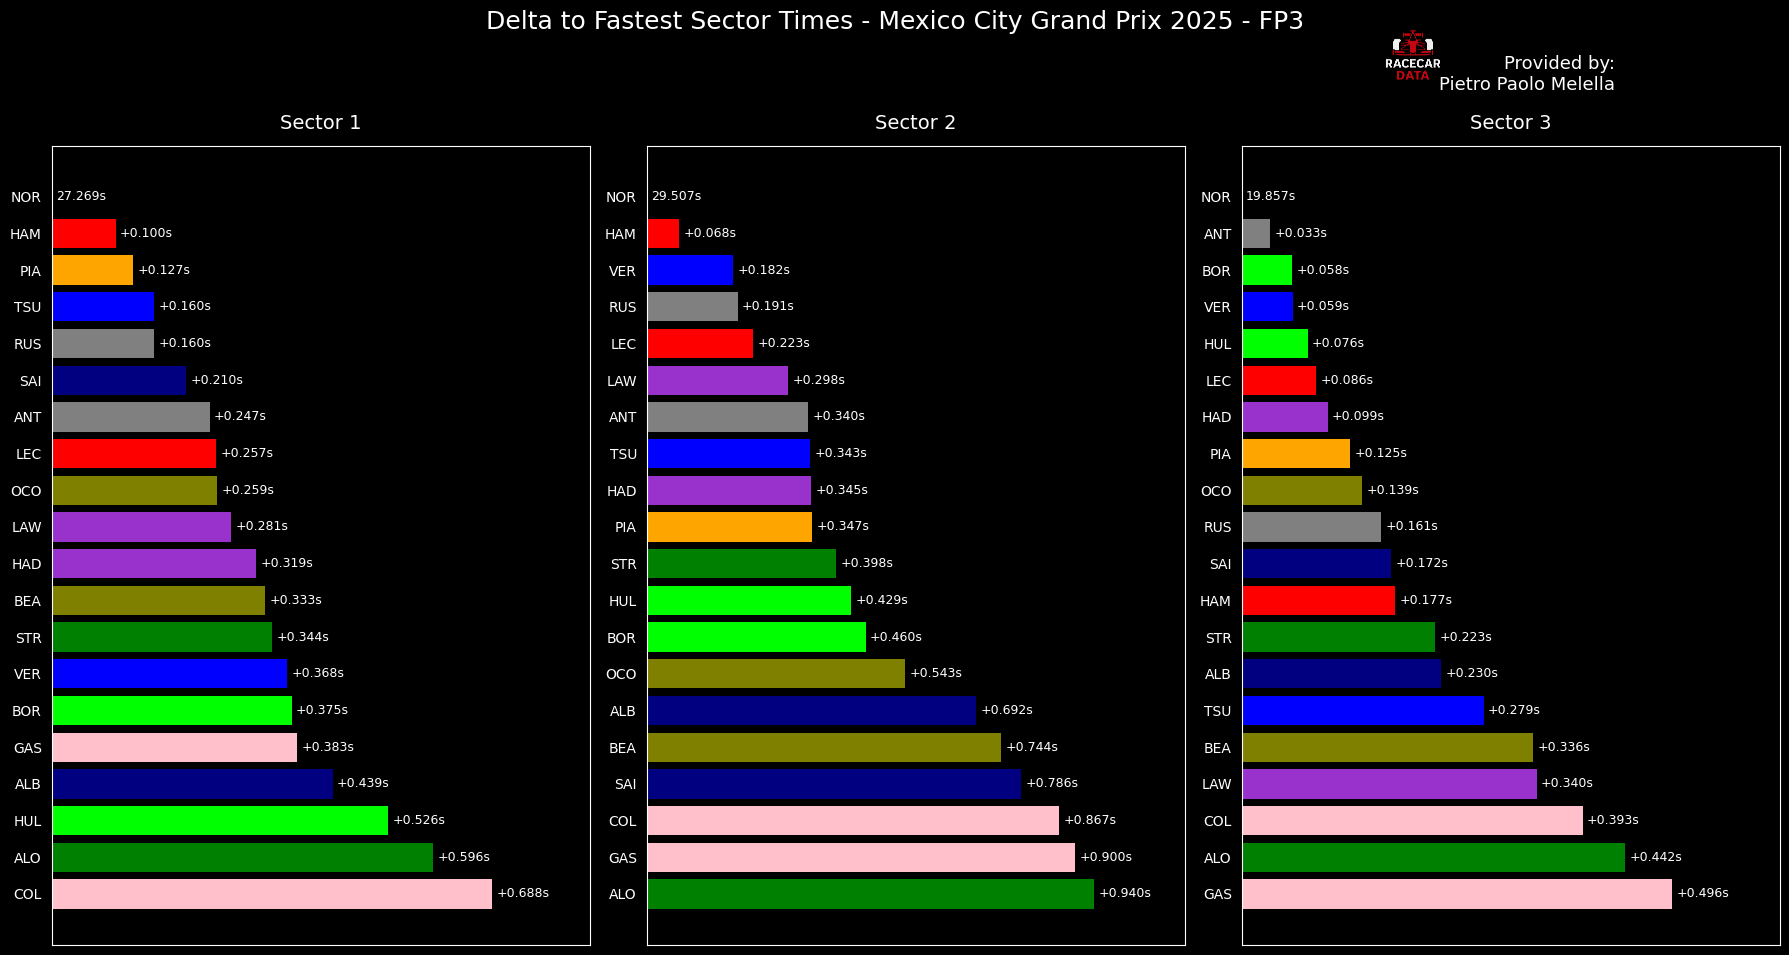

In [6]:
sd = f1.fastest_sectors_deltas.SectorDeltaPlotter(
    session, session_name, session_year, session_type
)
sd.plot()

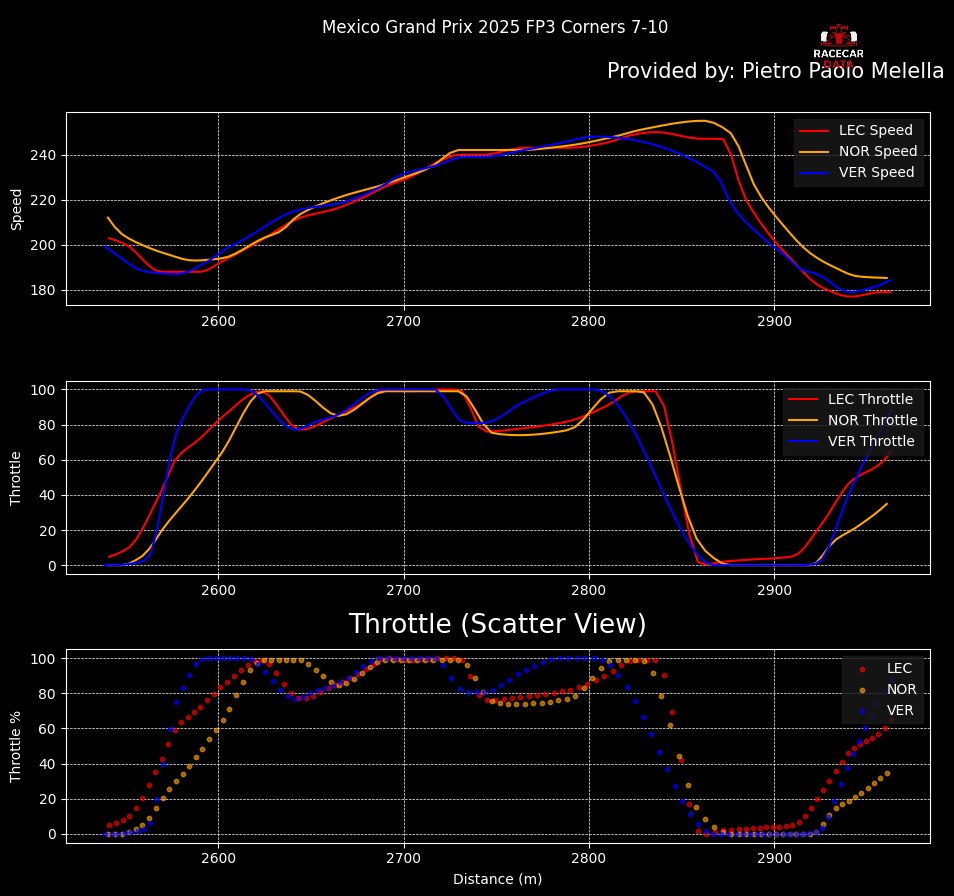

In [7]:
corners = [[7,8,9,10]]
for corner in corners:
    ca = f1.corner_analysis.CornerAnalysis(
        session, session_name, session_year, session_type,
        drivers={'LEC': 'fastest', 'NOR': 'fastest', 'VER': 'fastest'},
        corner_idxs=[corner], before=30, after=30
    )
    ca.plot_all(['Speed', 'Throttle' ])

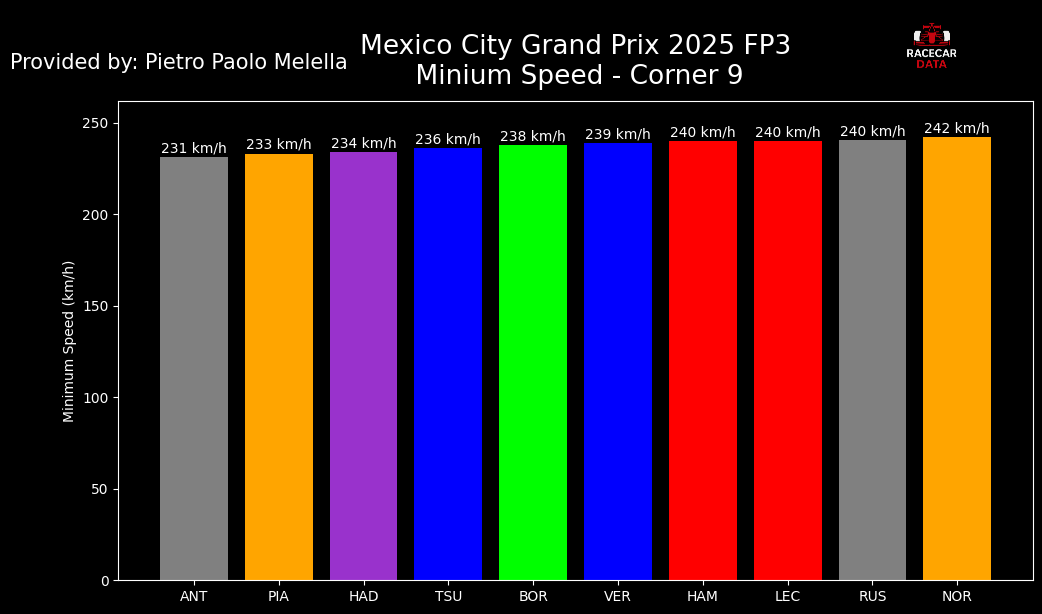

In [8]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[9], after=30, before=30, n_drivers=10
).plot()

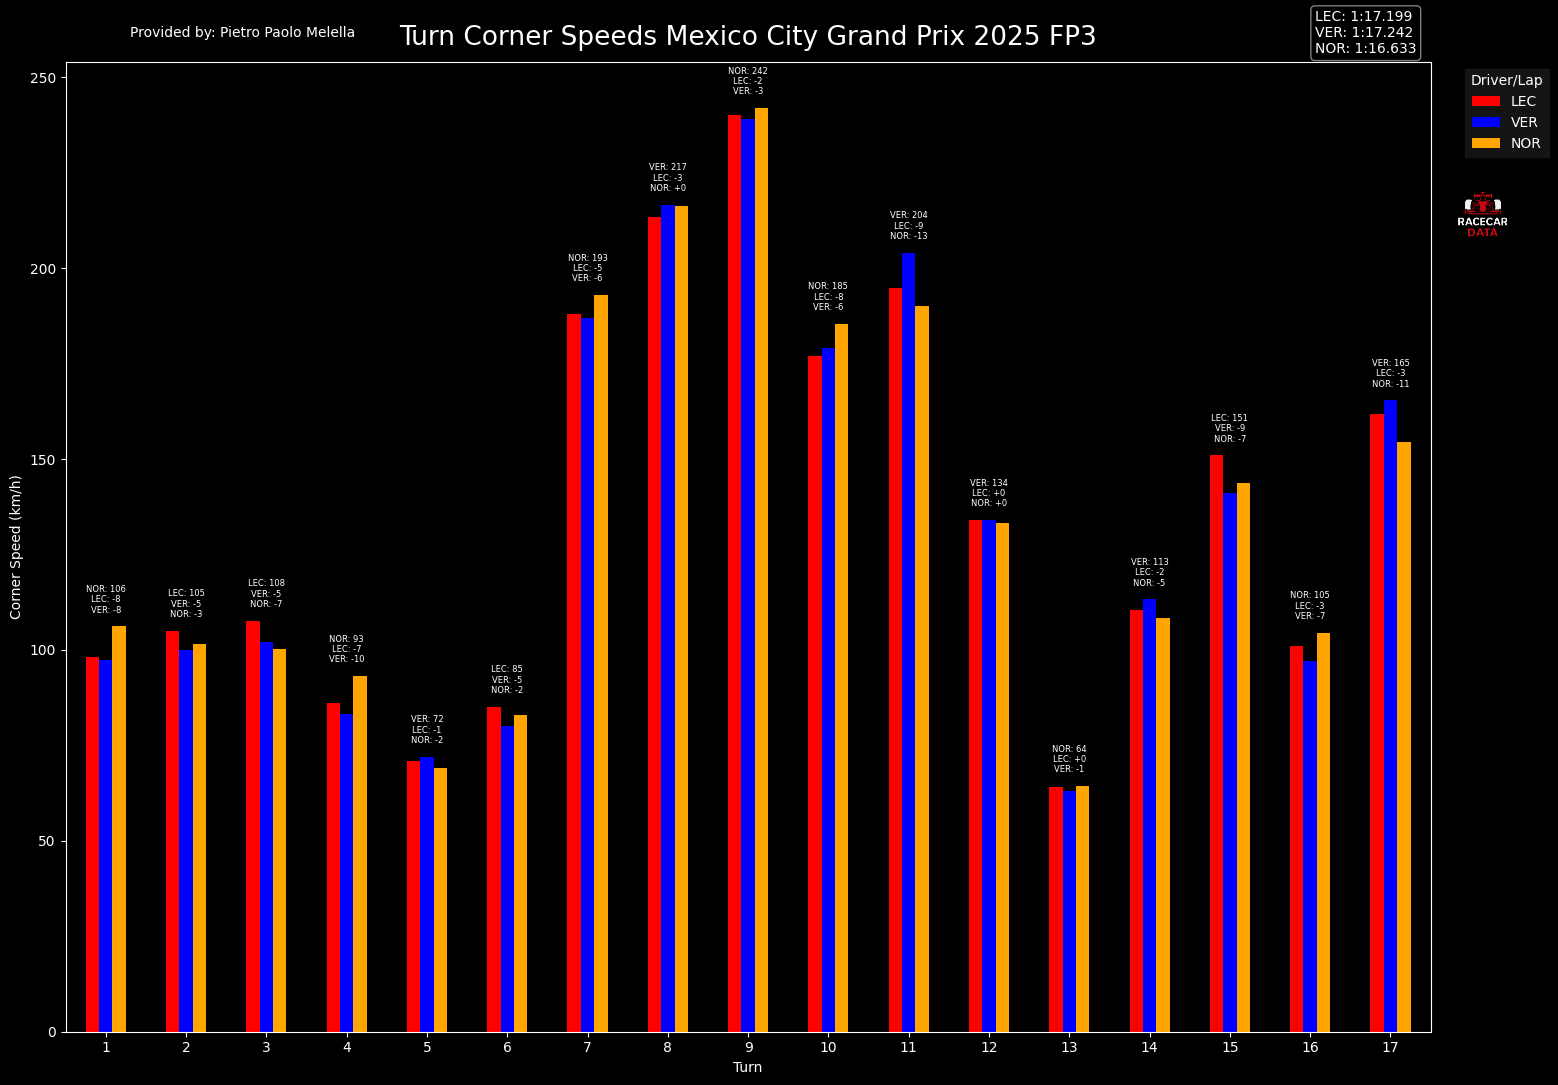

In [9]:
csc = f1.corner_speed.CornerSpeedComparator(
    drivers={'LEC': 'fastest', 'VER': 'fastest','NOR': 'fastest'},
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
).plot_peak_speeds()

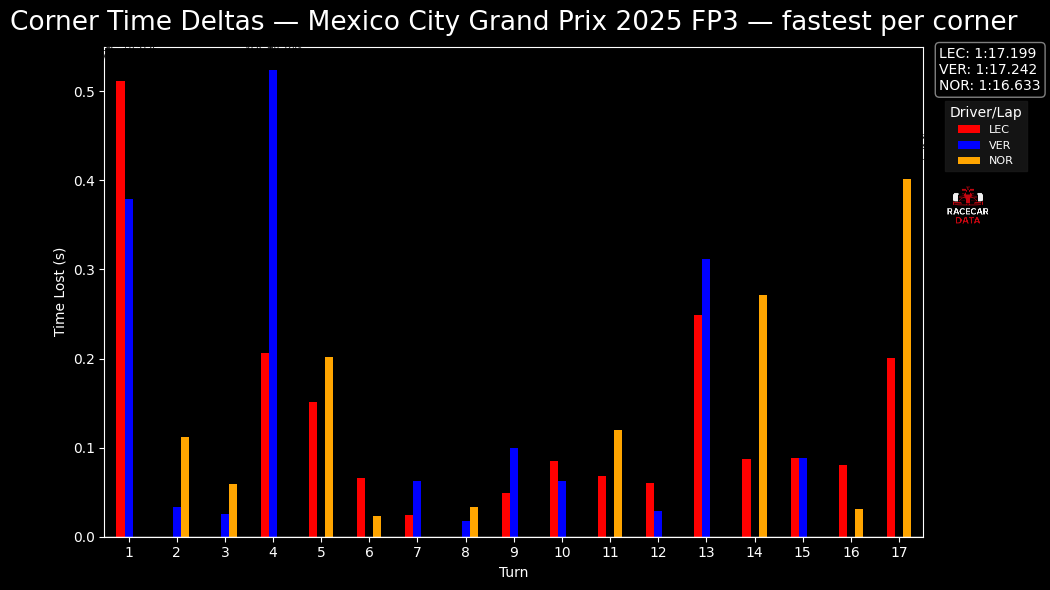

In [10]:
cmp = f1.corner_time_comparator.CornerTimeComparator(
    drivers=[('LEC','fastest'), ('VER','fastest'), ('NOR','fastest')],
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')

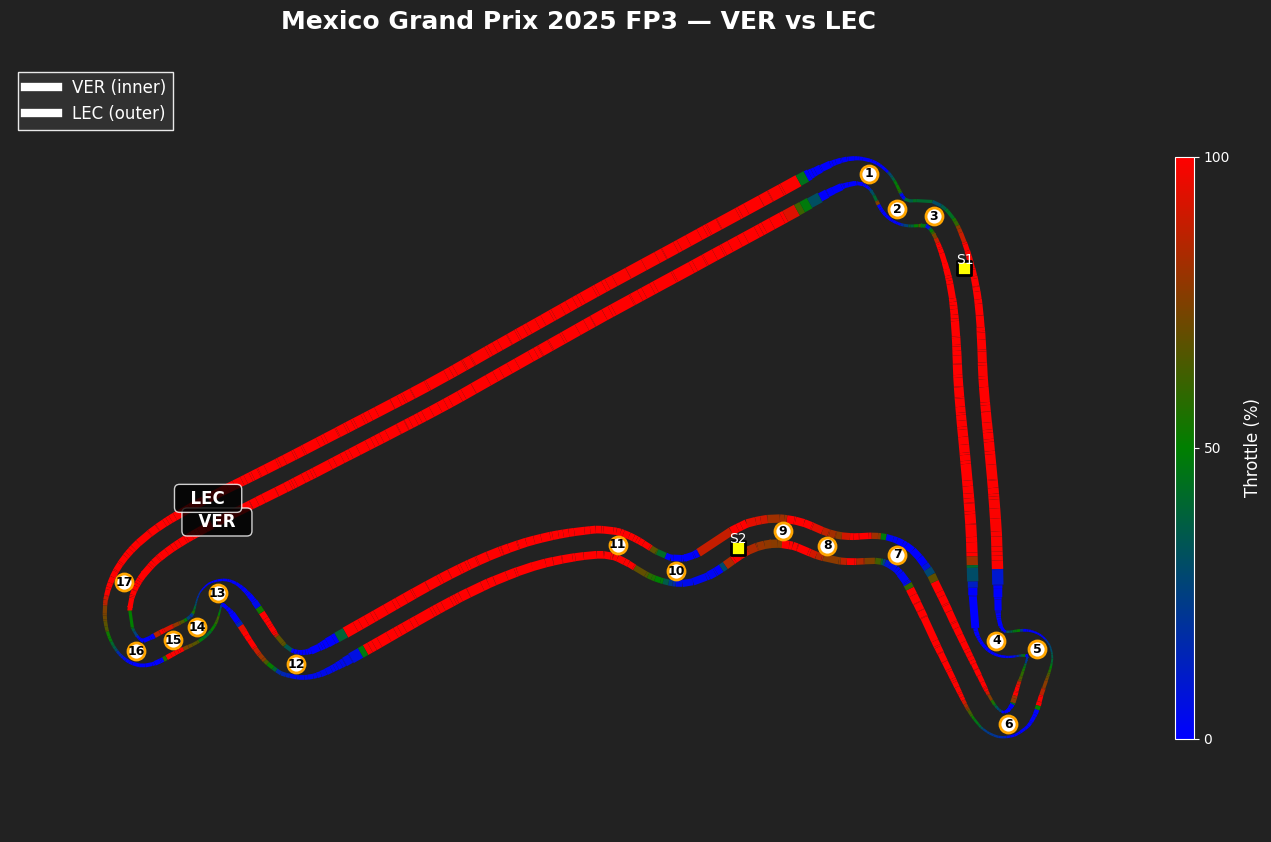

In [11]:
visualizer = f1.dual_throttle_compare.DualThrottleComparisonVisualizer(
    laps=laps,
    circuit_info=session.get_circuit_info(),
    reference_driver='VER',      # Red line
    comparison_driver='LEC',     # Blue line
    offset_distance=200,       # Distance between parallel lines
    event_name=session_name,
    year=session_year,
    session_name=session_type,
    annotate_sectors=True,
)

visualizer.plot()